In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [14]:
car_sales_df = pd.read_csv('/content/car_prices.csv')

print(car_sales_df.describe())

print("Entries: ", car_sales_df.shape[0])


                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  
Entries:  558837


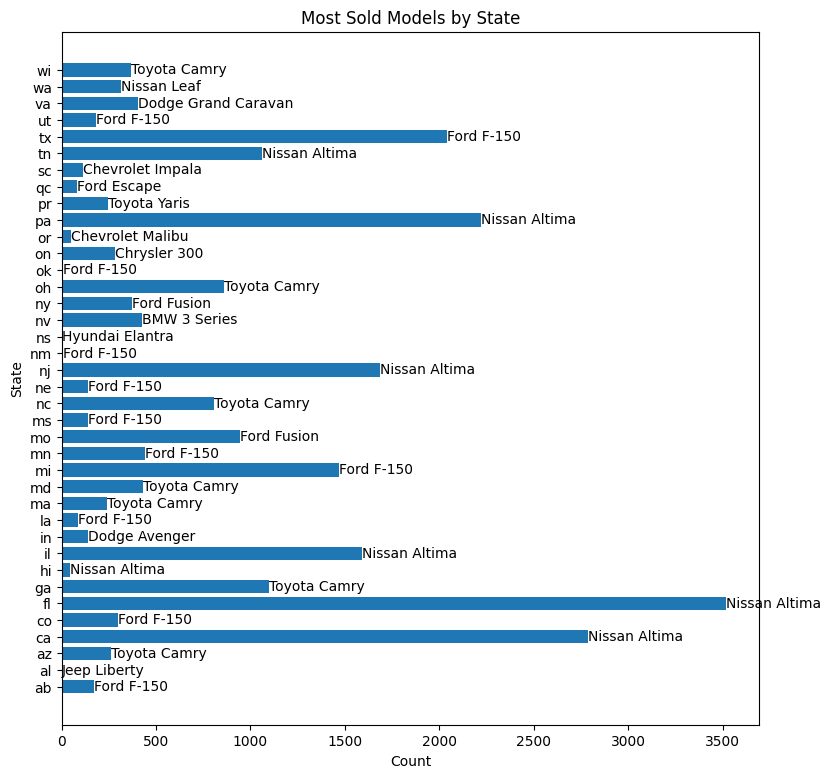

In [8]:
make_model_by_state = '/content/make_model_by_state.txt'

data = []

pattern = re.compile(r'\s+(\d+)\s+([a-z]{2})\s+([a-zA-Z0-9_]+)\s+(.+)')

with open(make_model_by_state, 'r') as file:
    for line in file:
        match = pattern.match(line)
        if match:
            count = int(match.group(1))
            state = match.group(2)
            make = match.group(3)
            model = match.group(4).strip()
            data.append([count, state, make, model])

make_model_by_state_df = pd.DataFrame(data, columns=['count', 'state', 'make', 'model'])

most_sold_models = make_model_by_state_df.loc[make_model_by_state_df.groupby('state')['count'].idxmax()]

most_sold_models.reset_index(drop=True, inplace=True)

plt.figure(figsize=(9, 9))
plt.barh(most_sold_models['state'], most_sold_models['count'])

plt.title('Most Sold Models by State')
plt.xlabel('Count')
plt.ylabel('State')

for i, model in enumerate(most_sold_models['count']):
    plt.text(model, i, f"{most_sold_models['make'][i]} {most_sold_models['model'][i]}", va='center', fontsize=10)

plt.show()

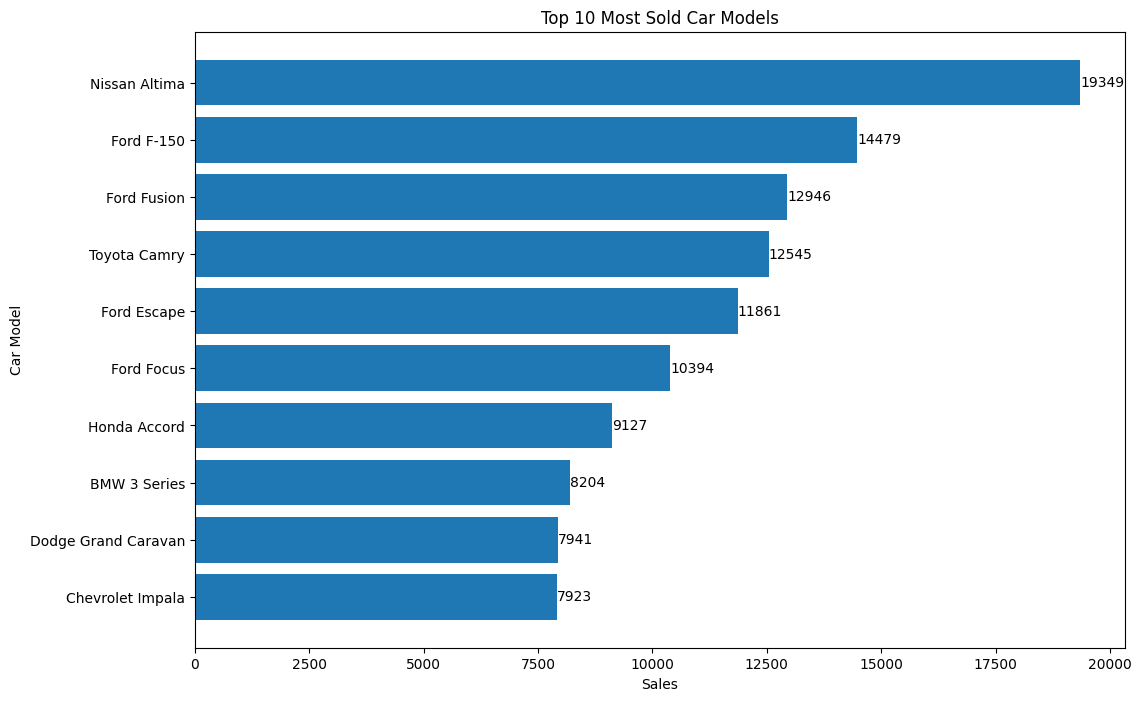

In [10]:
make_model_sales = '/content/make_model_sales.txt'

data = []

pattern = re.compile(r'\s+(\d+)\s+([a-zA-Z0-9_]+\s+.+)')

with open(make_model_sales, 'r') as file:
    for line in file:
        match = pattern.match(line)
        if match:
            count = int(match.group(1))
            make_model = match.group(2).strip()
            data.append([count, make_model])

make_model_sales_df = pd.DataFrame(data, columns=['count', 'make_model'])

top_10_sales_df = make_model_sales_df.head(10)

top_10_sales_df.reset_index(drop=True, inplace=True)


plt.figure(figsize=(12, 8))
plt.barh(top_10_sales_df['make_model'], top_10_sales_df['count'])

plt.xlabel('Sales')
plt.ylabel('Car Model')
plt.title('Top 10 Most Sold Car Models')
plt.gca().invert_yaxis()

for i, car in enumerate(top_10_sales_df['count']):
    plt.text(car, i, f"{top_10_sales_df['count'][i]}", va='center', fontsize=10)

plt.show()
